In [1]:
import numpy as np
import pandas as pd
import os
from collections import defaultdict

### Globals

In [2]:
OUTPUT_PATH = 'outputs/'
FEATURES_PATH = 'features/'
ALGORITHMS = ['dp1', 'dp2', 'greedy', 'bf', 'bnb']
LEVELS = [1,2,3,4,5]
LEVELS_SIZE = [19198 ,9983, 6664, 4994, 3999]
FEATURES = ['num_elem',
            'cap',
            'cap_mean_w',
            'cap_median_w', 
            'cap_desv_w', 
            'mean_w_mean_v',
            'median_w_median_v', 
            'desv_w_desv_v',
            'max_w_min_w',
            'max_v_min_v',
            'mean_w',
            'median_w', 
            'desv_w', 
            'min_w', 
            'max_w', 
            'mean_v', 
            'median_v', 
            'desv_v', 
            'min_v', 
            'max_v',
            'p_coef' 
           ]

### Helpers

In [3]:
def get_features(lvl, id_):
    return np.array(open(FEATURES_PATH +str(lvl)+'/'+ str(id_),'r').read().split(), dtype=float)

def get_best(lvl, id_, t):
    best_fo = 0
    best_alg = 0
    for alg in ALGORITHMS:
        if lvl not in list(alg_data[alg].keys()): continue
        for res in alg_data[alg][lvl][id_]:
            if res[1] < t and res[0] > best_fo:
                best_alg = ALGORITHMS.index(alg)+1
    return best_alg

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Reading outputs

In [4]:
output_files = os.listdir(OUTPUT_PATH)
alg_data = defaultdict(list)

print("Faltan los siguientes resultados:")
for alg in ALGORITHMS:
    alg_data[alg] = defaultdict(list)
    for lvl in LEVELS:
        filename = alg + "_" + str(lvl)
        if filename not in output_files: # En caso de que todavía no hayan resultados
            print(alg, lvl)
            continue
        alg_data[alg][lvl] = defaultdict(list)
        file = open(OUTPUT_PATH+filename,'r')
        for row in file:
            id_, fo, time = row.split()
            alg_data[alg][lvl][int(id_)].append([(int)(fo), (float)(time)])

Faltan los siguientes resultados:
dp2 3
dp2 4
dp2 5
greedy 5
bnb 5


In [5]:
train_data = []
train_label = []

count = 0

alg = 'dp1'
for lvl in LEVELS:
    print("level "+str(lvl)+"...")
    for id_ in range(LEVELS_SIZE[lvl-1]):
        fts = get_features(lvl, id_)
        for t in np.linspace(0.01,3,100):
            train_data.append([*fts, t+1])
            train_label.append(get_best(lvl, id_, t))
        count += 1

level 1...
level 2...
level 3...
level 4...
level 5...


In [6]:
data = pd.DataFrame(data=train_data, columns=[*FEATURES, 't'])

In [7]:
train_label.index(-1)

ValueError: -1 is not in list

In [8]:
data.head(10)

,num_elem,cap,cap_mean_w,cap_median_w,cap_desv_w,mean_w_mean_v,median_w_median_v,desv_w_desv_v,max_w_min_w,max_v_min_v,...,desv_w,min_w,max_w,mean_v,median_v,desv_v,min_v,max_v,p_coef,t
0,92.0,12.0,1.916667,1.714286,4.039866,0.126788,0.145833,0.097213,10.0,98.0,...,2.970396,1.0,11.0,49.380435,48.0,30.555666,1.0,99.0,0.052918,1.010000
1,92.0,12.0,1.916667,1.714286,4.039866,0.126788,0.145833,0.097213,10.0,98.0,...,2.970396,1.0,11.0,49.380435,48.0,30.555666,1.0,99.0,0.052918,1.040202
2,92.0,12.0,1.916667,1.714286,4.039866,0.126788,0.145833,0.097213,10.0,98.0,...,2.970396,1.0,11.0,49.380435,48.0,30.555666,1.0,99.0,0.052918,1.070404
3,92.0,12.0,1.916667,1.714286,4.039866,0.126788,0.145833,0.097213,10.0,98.0,...,2.970396,1.0,11.0,49.380435,48.0,30.555666,1.0,99.0,0.052918,1.100606
4,92.0,12.0,1.916667,1.714286,4.039866,0.126788,0.145833,0.097213,10.0,98.0,...,2.970396,1.0,11.0,49.380435,48.0,30.555666,1.0,99.0,0.052918,1.130808
5,92.0,12.0,1.916667,1.714286,4.039866,0.126788,0.145833,0.097213,10.0,98.0,...,2.970396,1.0,11.0,49.380435,48.0,30.555666,1.0,99.0,0.052918,1.161010
6,92.0,12.0,1.916667,1.714286,4.039866,0.126788,0.145833,0.097213,10.0,98.0,...,2.970396,1.0,11.0,49.380435,48.0,30.555666,1.0,99.0,0.052918,1.191212
7,92.0,12.0,1.916667,1.714286,4.039866,0.126788,0.145833,0.097213,10.0,98.0,...,2.970396,1.0,11.0,49.380435,48.0,30.555666,1.0,99.0,0.052918,1.221414
8,92.0,12.0,1.916667,1.714286,4.039866,0.126788,0.145833,0.097213,10.0,98.0,...,2.970396,1.0,11.0,49.380435,48.0,30.555666,1.0,99.0,0.052918,1.251616
9,92.0,12.0,1.916667,1.714286,4.039866,0.126788,0.145833,0.097213,10.0,98.0,...,2.970396,1.0,11.0,49.380435,48.0,30.555666,1.0,99.0,0.052918,1.281818


In [13]:
data.shape

(4483800, 22)

## NN

In [18]:
# TensorFlow and tf.keras
import tensorflow as tf
#from tensorflow import keras
#from keras.layers import Dropout, Dense
#from keras import Sequential
from keras.models import Model   
from keras.layers import *
# Helper libraries
import matplotlib.pyplot as plt

In [20]:
model = Sequential([
    Dense(128, input_shape = (22,), activation=tf.nn.relu),
    Dropout(0.5), #parametro prob de activacion
    Dense(128, activation=tf.nn.relu),
    Dropout(0.5), 
    Dense(10, activation=tf.nn.softmax)
])

In [25]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(np.array(train_data), np.array(train_label), epochs=20)

Epoch 1/20
4483800/4483800 [==============================] - 505s 113us/step - loss: 1.4385 - acc: 0.9107
Epoch 2/20
4483800/4483800 [==============================] - 492s 110us/step - loss: 1.4375 - acc: 0.9108
Epoch 3/20
4483800/4483800 [==============================] - 497s 111us/step - loss: 1.4375 - acc: 0.9108
Epoch 4/20
4483800/4483800 [==============================] - 499s 111us/step - loss: 1.4375 - acc: 0.9108
Epoch 5/20
4483800/4483800 [==============================] - 498s 111us/step - loss: 1.4375 - acc: 0.9108
Epoch 6/20
4483800/4483800 [==============================] - 498s 111us/step - loss: 1.4375 - acc: 0.9108
Epoch 7/20
4483800/4483800 [==============================] - 500s 111us/step - loss: 1.4375 - acc: 0.9108
Epoch 8/20
4483800/4483800 [==============================] - 496s 111us/step - loss: 1.4375 - acc: 0.9108
Epoch 9/20
2601184/4483800 [================>.............] - ETA: 3:30 - loss: 1.4370 - acc: 0.9108

In [24]:
print(np.array(train_data).shape, np.array(train_label).shape)

(4483800, 22) (4483800,)


In [32]:
sample = np.array(train_data[0])
sample = (np.expand_dims(sample,0))
predictions_single = model.predict(sample)

print(predictions_single)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


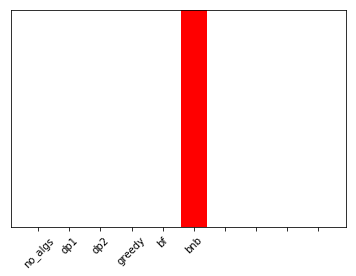

In [35]:
plot_value_array(0, predictions_single, np.array([1]))
_ = plt.xticks(range(10), ['no_algs',*ALGORITHMS], rotation=45)